In [1]:
import tensorflow as tf
print(tf.__version__)

2.3.0


In [2]:
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization, Conv1D, Conv2D, MaxPooling1D, MaxPooling2D

In [3]:
from tensorflow.keras.optimizers import Adam, SGD

In [4]:
import numpy as np
import pandas as pd

In [5]:
from sklearn.model_selection import train_test_split
from tqdm import tqdm

In [6]:
from sklearn.preprocessing import StandardScaler, normalize

In [7]:
data = pd.read_csv('exoTrain.csv')
test_data = pd.read_csv('exoTest.csv')

In [8]:
data.shape

(5087, 3198)

In [9]:
test_data.shape

(570, 3198)

In [10]:
# Preparing the Dependent and Independent Variables

x = data.drop(['LABEL'], axis = 1)
y = data['LABEL']

In [11]:
# Standardisation and Normalisation

x = normalize(x)
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [12]:
# Code to make all labels Binary
temp = []
for e in y:
    e = e-1
    temp.append(e)
  

In [13]:
# Splitting Dataset Into Training and Validation

X_train, X_test, y_train, y_test = train_test_split(x, temp, random_state = 0, test_size = 0.2)

In [14]:
# Let us See How Many Elements Are Present In Each Class

count_1 = 0
count_0 = 0
for e in y_train:
    if e == 1:
        count_1 = count_1 + 1
    elif e == 0:
        count_0 = count_0 + 1

In [15]:
print(count_0)
print(count_1)

4040
29


In [16]:
# Clearly the Dataset is Highly Imbalanced. Hence We need to Perform Synthetic Over Sampling.

In [17]:
#Preparing Test Set Data
x_testf = test_data.drop(['LABEL'], axis = 1)
y_testf = test_data['LABEL']
x_testf.shape
(570, 3197)
y_testf.shape
(570,)
x_testf = normalize(x_testf)
scaler = StandardScaler()
x_testf = scaler.fit_transform(x_testf)
# Code to make all labels Binary
temp2 = []
for e in y_testf:
    e = e-1
    temp2.append(e)
# x_testf and temp2 are the x_data and y_data for the test set respectively

In [18]:
# Now we use SMOTE to Synthesise Artificial Data to balance classes
from imblearn.over_sampling import SMOTE

In [19]:
sm = SMOTE(random_state=27)
x_train_res, y_train_res = sm.fit_sample(X_train, y_train)

In [20]:
# Let's count how many elements are present in Class 1
# The number of elements in each Class is now Equal

count_1 = 0
count_0 = 0
for e in y_train_res:
    if e == 1:
        count_1 = count_1 + 1
    elif e == 0:
        count_0 = count_0 + 1

In [21]:
print(count_0)
print(count_1)

4040
4040


In [22]:
x_train_res.shape

(8080, 3197)

In [23]:
np.shape(y_train_res)

(8080,)

In [24]:
# Changing Input Dimesnions to Make it Usable In CNNs

from numpy import newaxis
x_train = x_train_res[ :, :, newaxis]

In [25]:
x_train.shape

(8080, 3197, 1)

In [26]:
X_test.shape

(1018, 3197)

In [27]:
x_test = X_test[ :, :, newaxis]

In [28]:
x_test.shape

(1018, 3197, 1)

In [29]:
x_testf2 = x_testf[ :, :, newaxis]

In [30]:
x_testf2.shape

(570, 3197, 1)

In [31]:
# Note that x_test and y_test are for Validation. x_testf2 and temp2 are Test Set.
from keras.models import Sequential
from keras.layers import Dense,Flatten,Activation, Dropout
from keras.layers import Conv1D, MaxPooling1D, GlobalMaxPooling1D

## Multi-Channel CNN

In [32]:
# First Global-View CNN
model4 = Sequential(layers=[
    # Note the input shape is the desired size of the Signal 
    # This is the first convolution
    Conv1D(3, (2001), activation='relu', input_shape=(3197,1)),
    Conv1D(16, (5), activation='relu'),
    Conv1D(16, (5), activation='relu'),
    MaxPooling1D(5, 2),
   
    Conv1D(32, (5), activation='relu'),
    Conv1D(32, (5), activation='relu'),
    MaxPooling1D(5, 2),

    Conv1D(64, (5), activation='relu'),
    Conv1D(64, (5), activation='relu'),
    MaxPooling1D(5, 2),

    Conv1D(128, (5), activation='relu'),
    Conv1D(128, (5), activation='relu'),
    MaxPooling1D(5, 2),

    Conv1D(256, (5), activation='relu'),
    Conv1D(256, (5), activation='relu'),
    MaxPooling1D(5, 2),
  
    # Flatten the results to feed into a DNN
    Flatten(),
    Dense(256, activation='relu'),
    
])

model4.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 1197, 3)           6006      
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 1193, 16)          256       
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 1189, 16)          1296      
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 593, 16)           0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 589, 32)           2592      
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 585, 32)           5152      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 291, 32)           0

In [33]:
len(model4.layers)

18

In [33]:
# Local View CNN
model5 = Sequential(layers=[
    # Note the input shape is the desired size of the signal
    # This is the first convolution
    Conv1D(3, (201), activation='relu', input_shape=(3197,1)),
    Conv1D(16, (5), activation='relu'),
    Conv1D(16, (5), activation='relu'),
    MaxPooling1D(7, 2),
   
    Conv1D(32, (5), activation='relu'),
    Conv1D(32, (5), activation='relu'),
    MaxPooling1D(7, 2),

  
    # Flatten the results to feed into a DNN
    Flatten(),
    Dense(256, activation='relu'),

    
])

model5.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_11 (Conv1D)           (None, 2997, 3)           606       
_________________________________________________________________
conv1d_12 (Conv1D)           (None, 2993, 16)          256       
_________________________________________________________________
conv1d_13 (Conv1D)           (None, 2989, 16)          1296      
_________________________________________________________________
max_pooling1d_5 (MaxPooling1 (None, 1492, 16)          0         
_________________________________________________________________
conv1d_14 (Conv1D)           (None, 1488, 32)          2592      
_________________________________________________________________
conv1d_15 (Conv1D)           (None, 1484, 32)          5152      
_________________________________________________________________
max_pooling1d_6 (MaxPooling1 (None, 739, 32)          

In [34]:
# Merging outputs of both Models Together

from keras.layers import concatenate
from keras.layers import *
mergedOut = Add()([model4.output,model5.output])

In [35]:
# Adding Some Fully-Connected Layers

mergedOut = Dense(512, activation='relu')(mergedOut)
mergedOut = Dense(512, activation='relu')(mergedOut)
mergedOut = Dense(512, activation='relu')(mergedOut)

# output layer
mergedOut = Dense(1, activation='sigmoid')(mergedOut)

In [36]:
from keras.models import Model

newModel = Model([model4.input,model5.input], mergedOut)
newModel.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
conv1d_input (InputLayer)       [(None, 3197, 1)]    0                                            
__________________________________________________________________________________________________
conv1d (Conv1D)                 (None, 1197, 3)      6006        conv1d_input[0][0]               
__________________________________________________________________________________________________
conv1d_1 (Conv1D)               (None, 1193, 16)     256         conv1d[0][0]                     
__________________________________________________________________________________________________
conv1d_2 (Conv1D)               (None, 1189, 16)     1296        conv1d_1[0][0]                   
_______________________________________________________________________________________

In [79]:
import keras
from tensorflow.keras.optimizers import Adam, SGD
adam = keras.optimizers.Adadelta(learning_rate=0.001, rho=0.95)
sgd =  keras.optimizers.Adadelta(learning_rate=0.001)
newModel.compile(loss='binary_crossentropy',
               optimizer = adam,     #choose the optimizer you want
               metrics=['acc'])

In [90]:
history4 = newModel.fit([np.array(x_train),np.array(x_train)], np.array(y_train_res), epochs = 15, batch_size = 10, validation_data = ([np.array(x_test),np.array(x_test)],np.array(y_test)))

Epoch 1/15
808/808 [==============================] - 117s 145ms/step - loss: 0.0063 - acc: 0.9989 - val_loss: 0.1009 - val_acc: 0.9794
Epoch 2/15
808/808 [==============================] - 115s 143ms/step - loss: 0.0061 - acc: 0.9988 - val_loss: 0.0967 - val_acc: 0.9823
Epoch 3/15
808/808 [==============================] - 115s 143ms/step - loss: 0.0057 - acc: 0.9990 - val_loss: 0.1006 - val_acc: 0.9804
Epoch 4/15
808/808 [==============================] - 120s 149ms/step - loss: 0.0054 - acc: 0.9991 - val_loss: 0.0981 - val_acc: 0.9813
Epoch 5/15
808/808 [==============================] - 136s 168ms/step - loss: 0.0050 - acc: 0.9991 - val_loss: 0.1006 - val_acc: 0.9804
Epoch 6/15
808/808 [==============================] - 142s 176ms/step - loss: 0.0048 - acc: 0.9993 - val_loss: 0.0989 - val_acc: 0.9813
Epoch 7/15
808/808 [==============================] - 214s 265ms/step - loss: 0.0046 - acc: 0.9994 - val_loss: 0.0995 - val_acc: 0.9813
Epoch 8/15
808/808 [============================

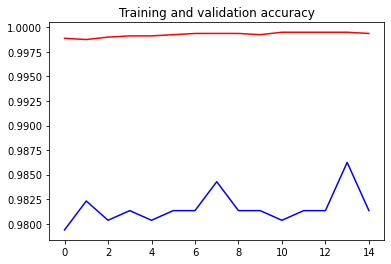

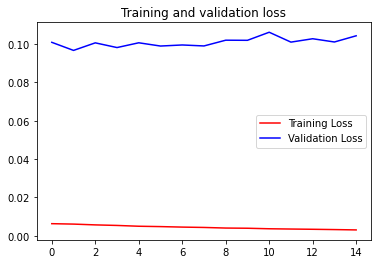

In [91]:
import matplotlib.pyplot as plt
acc = history4.history['acc']
val_acc = history4.history['val_acc']
loss = history4.history['loss']
val_loss = history4.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [92]:
# We can Observe from Loss and Accuracy Graphs that Model isn't Overtfitting
y_pred = newModel.predict([x_test,x_test])
y_pred2 = []
for m in y_pred:
    if m > 0.5:
        y_pred2.append(1)
    else:
        y_pred2.append(0)

In [93]:
from sklearn.metrics import confusion_matrix, classification_report


array([[998,   7],
       [ 12,   1]], dtype=int64)

In [ ]:
y_pred2 = newModel.predict([x_testf2,x_testf2])
y_pred3 = []
for m in y_pred2:
    if m > 0.5:
        y_pred3.append(1)
    else:
        y_pred3.append(0)

In [97]:
confusion_matrix([int(x) for x in temp2],[int(y) for y in y_pred3])

array([[564,   1],
       [  3,   2]], dtype=int64)

In [96]:
# Precision and Recall are perfect for the Non-ExoPlanets because the model predicts Non-ExoPlanets Flawlessly
# Recall goes down for Exo-Planets because 2 Exo-Planets were Mis-Classified as Non-ExoPlanets

print(classification_report([int(x) for x in temp2],[int(y) for y in y_pred3]))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       565
           1       0.67      0.40      0.50         5

    accuracy                           0.99       570
   macro avg       0.83      0.70      0.75       570
weighted avg       0.99      0.99      0.99       570

